# Heart Disease Prediction Project

## Step 1: Problem Definition

Cardiovascular diseases are among the leading causes of mortality worldwide. Early detection of heart disease can significantly improve the chances of effective treatment and prevention. However, identifying heart disease based solely on clinical examination is often challenging, especially in resource-constrained environments.

This project aims to develop a machine learning model that can predict the presence of heart disease in patients based on various medical attributes such as age, sex, blood pressure, cholesterol levels, and more. Using the [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset), we will train, evaluate, and interpret models to assist in clinical decision-making.

The primary objective is to create a tool that can support healthcare professionals by providing a second opinion or pre-screening patients, potentially improving the efficiency and accuracy of diagnosis.

## Use Cases: 

- **Pre-Screening Tool**: Helps identify high-risk patients before detailed diagnostic tests are performed, saving time and resources.
- **Clinical Decision Support**: Acts as a supplementary opinion for doctors, reducing the chances of human error in diagnosis.
- **Patient Stratification**: Assists in stratifying patients into different risk levels, which can guide urgency in treatment or further investigation.
- **Data-Driven Insights**: Offers interpretability into which features (e.g., cholesterol levels, resting blood pressure, age) are most indicative of heart disease in the given population.
- **Scalability**: Can be deployed in remote or under-resourced settings where access to cardiologists is limited.

By integrating this model into clinical workflows or screening programs, healthcare providers can make more informed decisions and potentially improve patient outcomes.


# Importing Necessary Libraries #

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import boxcox
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import shap

import warnings

warnings.filterwarnings('ignore')

# Step 2: Data Understanding #

<h5><u>Loading and Insecting the Data</u></h5>

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
df.shape # Dimensions of the DataFrame

(1025, 14)

In [5]:
#-------Column Names--------------------------------------
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#-----Data Type Inspection of the Columns------------------------------------
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<h3>Columns Description</h3>

| Column Name  | Description                                                                                                  |
| ------------ | ------------------------------------------------------------------------------------------------------------ |
| **age**      | Age of the patient in years.                                                                                 |
| **sex**      | Sex of the patient (0 = female, 1 = male).                                                                   |
| **cp**       | Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic).               |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital).                                              |
| **chol**     | Serum cholesterol in mg/dl.                                                                                  |
| **fbs**      | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).                                                       |
| **restecg**  | Resting electrocardiographic results (0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy). |
| **thalach**  | Maximum heart rate achieved.                                                                                 |
| **exang**    | Exercise-induced angina (1 = yes; 0 = no).                                                                   |
| **oldpeak**  | ST depression induced by exercise relative to rest (a measure of ischemia).                                  |
| **slope**    | The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping).                           |
| **ca**       | Number of major vessels (0–3) colored by fluoroscopy.                                                        |
| **thal**     | Thalassemia status (1: normal, 2: fixed defect, 3: reversible defect).                                       |
| **target**   | Heart disease presence (0 = no disease, 1 = disease present).                                                |


<h5><u> Checking for Missing Values  </u></h5>

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h5><u> Checking for  Duplicates  </u></h5>

In [8]:
df.duplicated().sum()

723

In [9]:
df.drop_duplicates(inplace=True)  

<b> Dropping the Duplicated Columns to perform EDA because duplicates,
can distort the results and lead to misleading interpretations.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Continous Variables
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # Categorical Variables
target = ['target'] # Target Variable
   

In [13]:
df[categorical_features].nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
dtype: int64

In [14]:
df[continuous_features].nunique()

age          41
trestbps     49
chol        152
thalach      91
oldpeak      40
dtype: int64

<h5><u>Observations</h5>

<ul>
    <li>There are No Missing Values</li>
    <li>The DataTypes of the Columns seems to be correct. No need to address that in Data Preprocessing</li>
    <li>Duplicated Records has already been dropped to perfrom EDA</li>
</ul>

# Step 3: Exploratory Data Analysis #

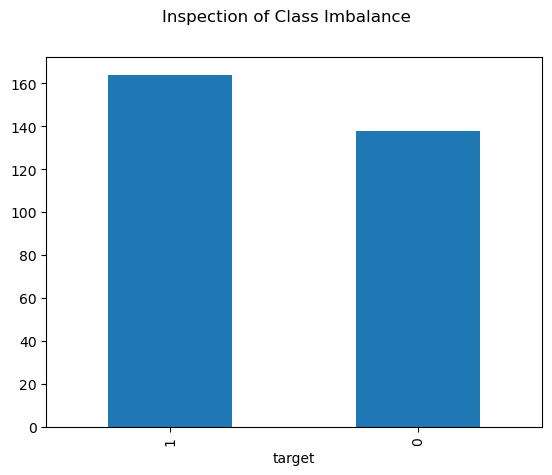

In [15]:
plt.suptitle('Inspection of Class Imbalance')
df['target'].value_counts().plot(kind='bar')
plt.show()

In [16]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

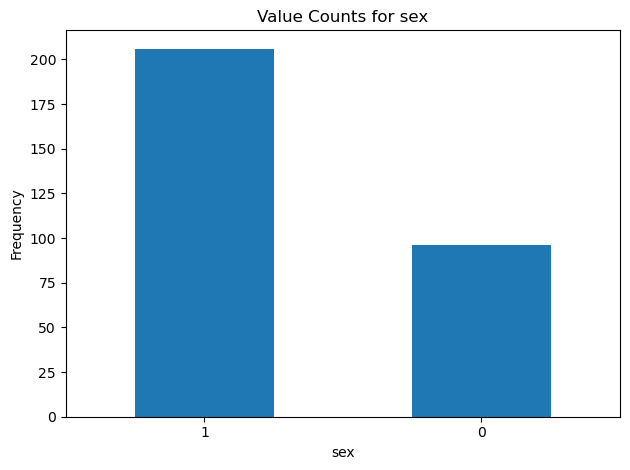

In [17]:
def plot_Categorical(column_Name):
    df[column_Name].value_counts().plot(kind='bar')
    plt.title(f'Value Counts for {column_Name}')
    plt.xlabel(column_Name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_Categorical('sex')

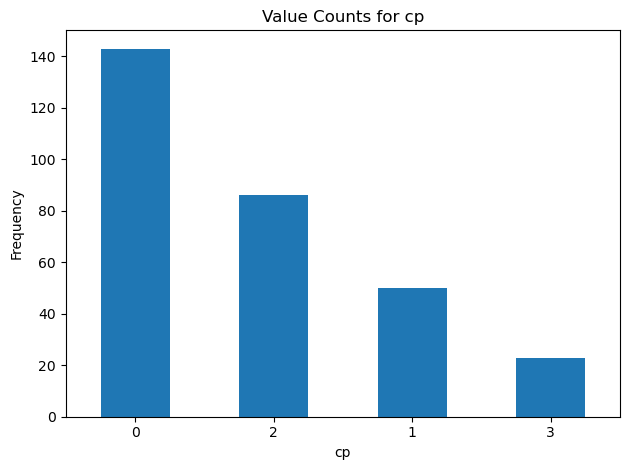

In [18]:
plot_Categorical('cp')

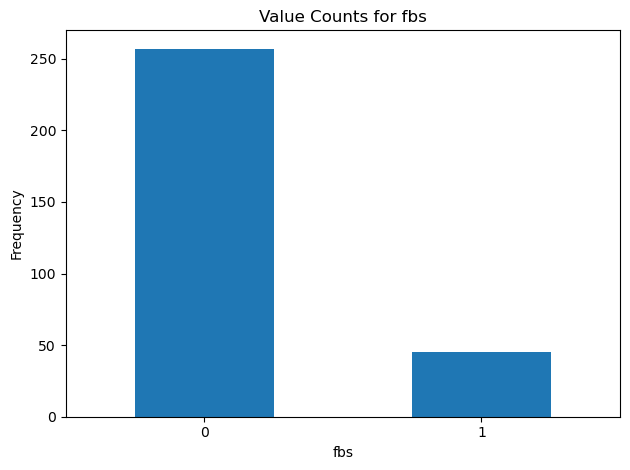

In [19]:
plot_Categorical('fbs')

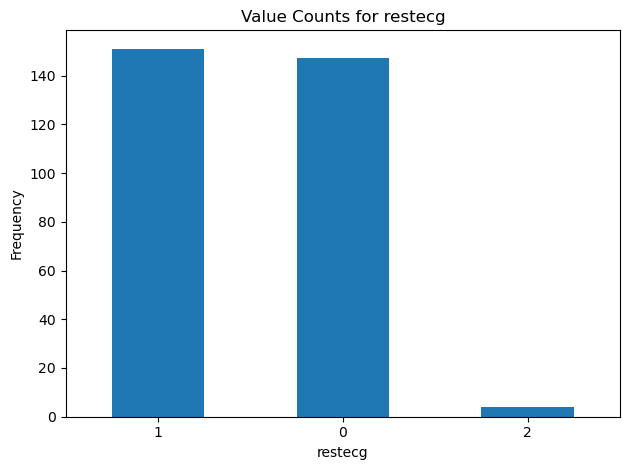

In [20]:
plot_Categorical('restecg')

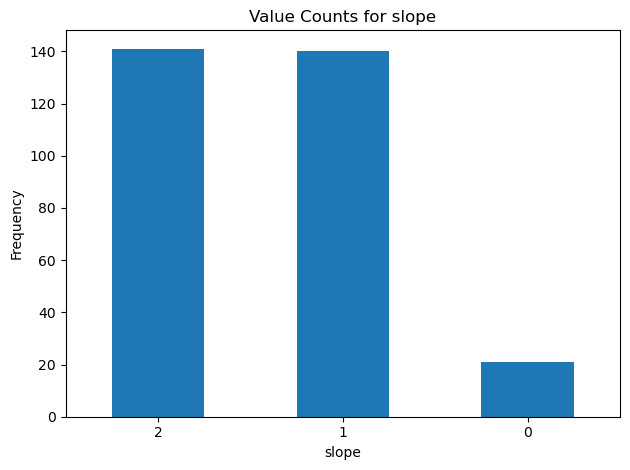

In [21]:
plot_Categorical('slope')

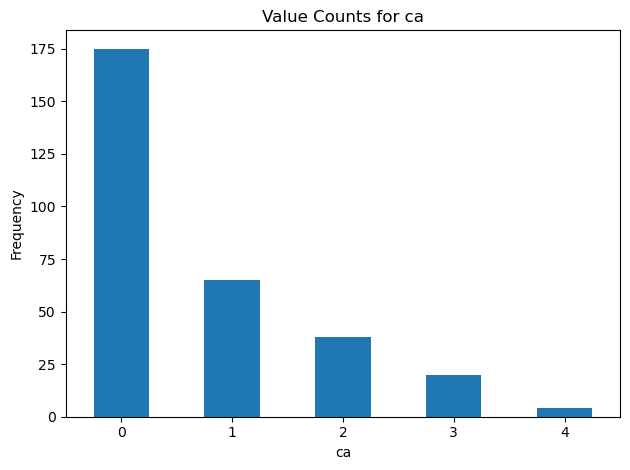

In [22]:
plot_Categorical('ca')

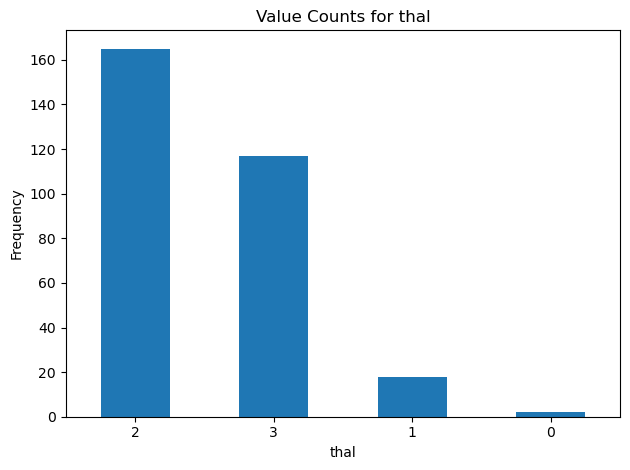

In [23]:
plot_Categorical('thal')

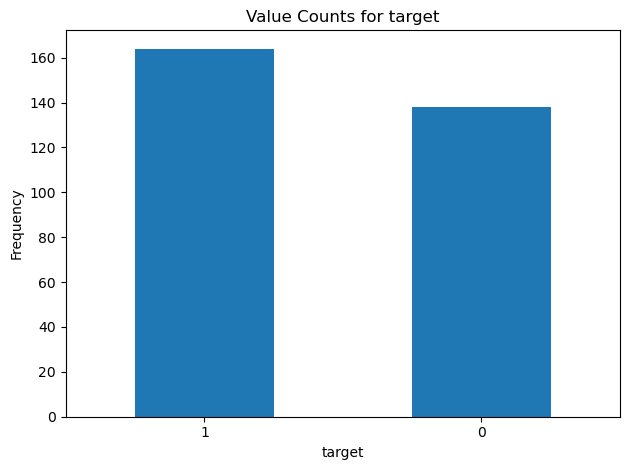

In [24]:
plot_Categorical('target')

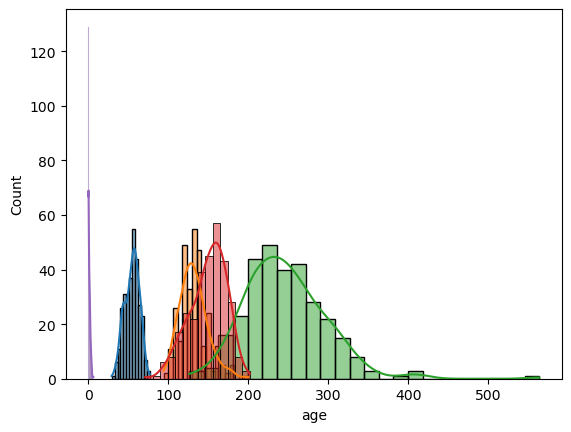

In [25]:
import seaborn as sns
for col in continuous_features:
    sns.histplot(df[col], kde=True)


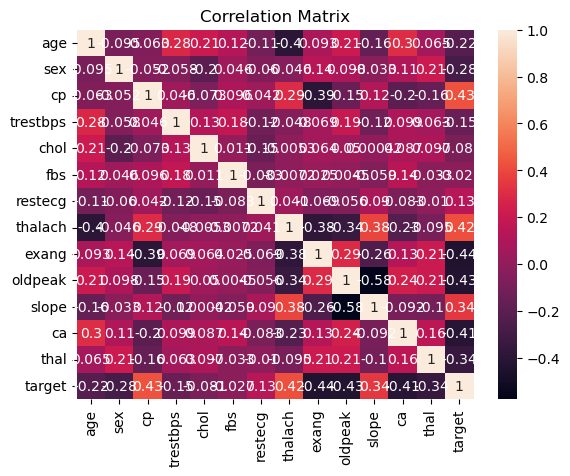

In [26]:
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True)
plt.show()

<h5><u>Observations</h5>
<ul>
    <li>Negative Class is slightly less. But, no significant class imbalance is observed.</li>
</ul>

# Step 4: Data Preprocessing #

In [27]:
df.skew() #Checking the Skewness of the Columns

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

In [28]:
print(f'Minimum Age found: {df['age'].min()}')
print(f'Maximun Age found: {df['age'].max()}')
print(f'Unique Elements in Sex Column: {df['sex'].unique()}')
print(f'The Maximum heart rate achieved: {df['thalach'].max()}')
print(f'The slope of the peak exercise ST segment: {df['slope'].unique()}')
print(f' Thalassemia status: {df['thal'].unique()}')

Minimum Age found: 29
Maximun Age found: 77
Unique Elements in Sex Column: [1 0]
The Maximum heart rate achieved: 202
The slope of the peak exercise ST segment: [2 0 1]
 Thalassemia status: [3 2 1 0]


<b> I Identified that the 'age' column is Negatively Skewed but there is no noise present in it. So, I decided to retrain it.<br>
<b> Sex Column --- > Negatively Skewed but No Noise found.<br>
<b> Medically the maximum heart rate that can be achieved is 220. So, we can retrain this column along with outliers.<br>
<b> Slope, thal, target doesnt have a noise.<br>
<h3>Even if there are outliers but no noise, i decided to retrain them without any transformation</h3>

# Step 5: Modeling #

In [29]:
X = df.drop(columns=['target']) # Independent variables 
y = df['target'] # Target Variable

In [30]:
#----Splitting the Data------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

In [31]:
#-----Standardizing the Continous variables----------------------------------------------
sc = StandardScaler()

In [32]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Scaling only the continous variables

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()



X_train_scaled[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = sc.transform(X_test[columns_to_scale])



In [33]:
#------Creating a DataFrame that stores all the metrics and performance of each model which will help in Model Selection----------------
algorithms = ['baseline_Model','logistic_Model', 'knn_Model', 'svm_Model', 'dt_Model', 'rf_Model', 'ada_Model', 'gb_Model', 'xg_Model']
metrics = ['TrainAccuracy', 'TestAccuracy', 'TrainPrecision', 'TestPrecision','TrainRecall', 'TestRecall',
          'TrainF1', 'TestF1', 'CV']

analysis_df = pd.DataFrame(index=algorithms, columns=metrics)

In [34]:
#-----DataFrame to store metrics useful for further analysis and Model Selection-------------------------
analysis_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV
baseline_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logistic_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
svm_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dt_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rf_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ada_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gb_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xg_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#---Function that calculates all the metrics and Classification report and updatas values in the analysis_df DataFrame--------------------
def model_performance(model_key, model_obj, X_train, y_train, X_test, y_test, analysis_df):
    y_train_pred = model_obj.predict(X_train)
    y_test_pred = model_obj.predict(X_test)

    
    analysis_df.loc[model_key, 'TrainAccuracy'] = accuracy_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestAccuracy'] = accuracy_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainPrecision'] = precision_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestPrecision'] = precision_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainRecall'] = recall_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestRecall'] = recall_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainF1'] = f1_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestF1'] = f1_score(y_test, y_test_pred)

    cv_score = cross_val_score(model_obj, X_train, y_train, cv=5, scoring='accuracy').mean()
    analysis_df.loc[model_key, 'CV'] = cv_score

    print(f'Classification Report — {model_key} (Train)')
    print(classification_report(y_train, y_train_pred))
    print(f'Classification Report — {model_key} (Test)')
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix - Train
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot(cmap='Blues')
    plt.title(f'{model_key} — Confusion Matrix (Train)')
    plt.show()

    # Confusion Matrix - Test
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Oranges')
    plt.title(f'{model_key} — Confusion Matrix (Test)')
    plt.show()
    

    return analysis_df

<h3>Baseline Model</h3>

A Logistuc Regression Model with No Fine-Tuning is used as the Baseline Model which will serve as the component to compare further models

In [36]:
baseline_Model = LogisticRegression()

In [37]:
baseline_Model.fit(X_train_scaled, y_train)

LogisticRegression()

Classification Report — baseline_Model (Train)
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       106
           1       0.86      0.93      0.89       135

    accuracy                           0.87       241
   macro avg       0.88      0.86      0.87       241
weighted avg       0.87      0.87      0.87       241

Classification Report — baseline_Model (Test)
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.72      0.90      0.80        29

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



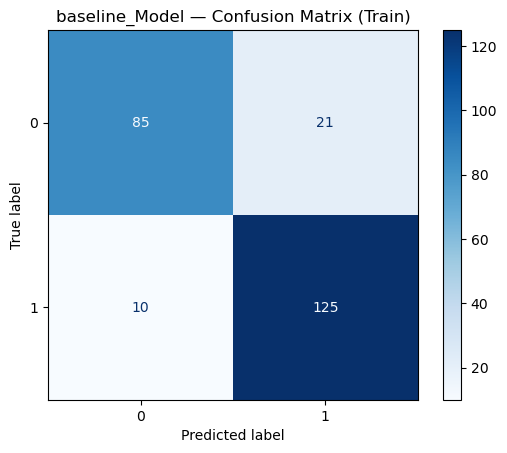

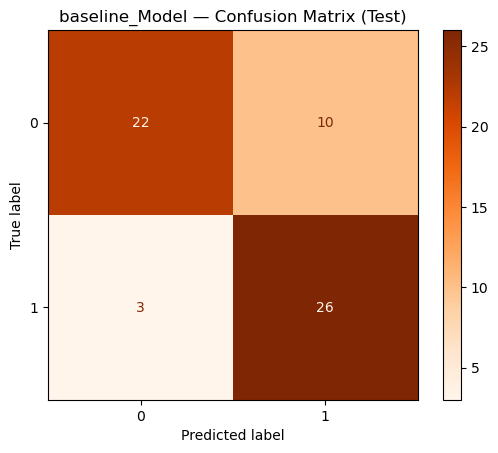

In [38]:
baseline_Model_Report = model_performance('baseline_Model', baseline_Model, X_train_scaled, y_train, X_test_scaled, y_test, analysis_df)

In [39]:
analysis_df.loc['baseline_Model']

TrainAccuracy     0.871369
TestAccuracy      0.786885
TrainPrecision    0.856164
TestPrecision     0.722222
TrainRecall       0.925926
TestRecall        0.896552
TrainF1            0.88968
TestF1                 0.8
CV                0.829677
Name: baseline_Model, dtype: object

## Observations (Baseline Model) ##

- The model performs well on the training set, indicating it has learned meaningful patterns.

- There's a noticeable drop in test accuracy, suggesting mild overfitting.

- Class 0 is under-represented in recall on the test set, meaning it misses several true positives.

- Class 1 has high recall but lower precision, indicating it may be predicting class 1 too liberally (i.e., more false positives).

- Overall, the model has a reasonable starting point but needs improvement in generalization and class-wise balance.

<h3>Logistic Regression</h3>

In [40]:
estimator = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' supports both l1 and l2
    'class_weight': [None, 'balanced']
}

In [41]:
grid_lr = GridSearchCV(estimator, param_grid, cv=5, scoring='f1')
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [42]:
grid_lr.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

In [43]:
logistic_Model = LogisticRegression(
    C=1,
    penalty='l2',
    solver='liblinear',
    class_weight=None
)

In [44]:
logistic_Model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, solver='liblinear')

Classification Report — logistic_Model (Train)
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       106
           1       0.86      0.92      0.89       135

    accuracy                           0.87       241
   macro avg       0.87      0.86      0.87       241
weighted avg       0.87      0.87      0.87       241

Classification Report — logistic_Model (Test)
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



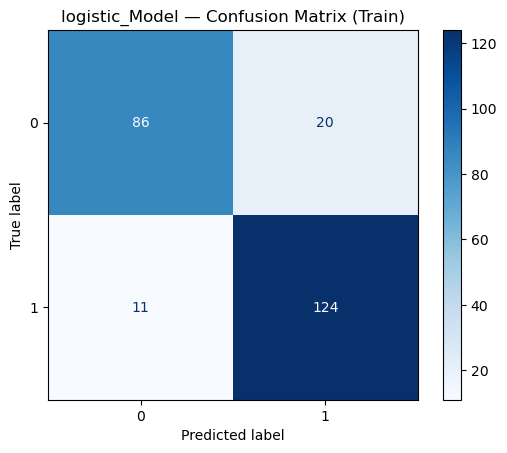

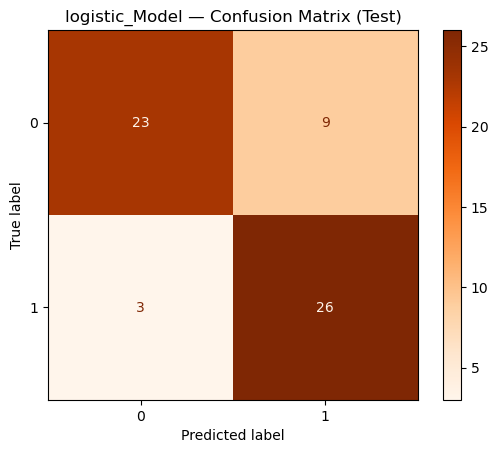

In [45]:
logistic_Model_Report = model_performance('logistic_Model', logistic_Model, X_train_scaled, y_train, X_test_scaled, y_test, analysis_df)

In [46]:
analysis_df.loc['logistic_Model']

TrainAccuracy     0.871369
TestAccuracy      0.803279
TrainPrecision    0.861111
TestPrecision     0.742857
TrainRecall       0.918519
TestRecall        0.896552
TrainF1           0.888889
TestF1              0.8125
CV                0.829762
Name: logistic_Model, dtype: object

###  Observations (Logistic Regression Model - After Hyperparameter Tuning)

- The model maintains strong **training performance**, similar to the baseline, with well-balanced precision and recall across both classes.
- On the **test set**, generalization improves slightly compared to the baseline model — particularly in terms of **class-wise balance**.
- **Class 0** shows lower recall again (0.72), meaning some true negatives are being missed.
- **Class 1** retains high recall (0.90), with moderate precision, suggesting the model is slightly biased toward detecting this class.
- Overall, the model offers **slightly better generalization and stability**, though **room remains for improving recall in class 0**.


<h3>KNN [K Nearest Neighbors]</h3>

In [47]:
estimator = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [x for x in range(1,20)]
}
grid_knn = GridSearchCV(estimator, param_grid, cv=5, scoring='recall')

In [48]:
X_train_scaled.shape

(241, 13)

In [49]:
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='recall')

In [50]:
grid_knn.best_params_

{'n_neighbors': 15}

In [51]:
knn_Model = KNeighborsClassifier(n_neighbors=15)

In [52]:
knn_Model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15)

Classification Report — knn_Model (Train)
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       106
           1       0.80      0.93      0.86       135

    accuracy                           0.83       241
   macro avg       0.84      0.81      0.82       241
weighted avg       0.83      0.83      0.82       241

Classification Report — knn_Model (Test)
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



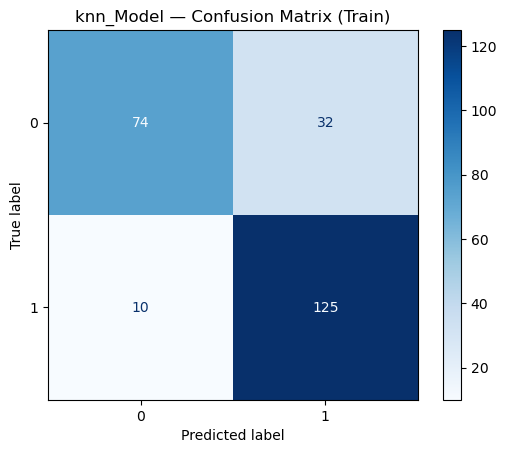

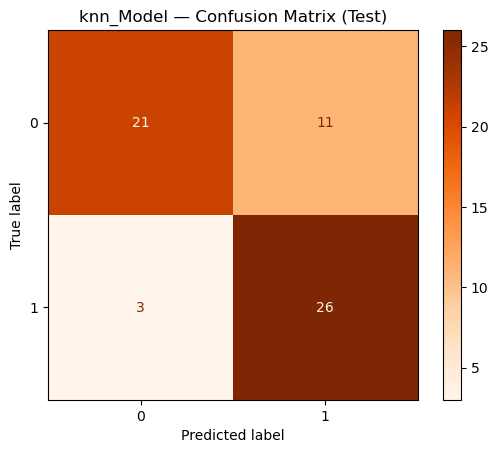

In [53]:
knn_Model_Report = model_performance('knn_Model', knn_Model, X_train_scaled, y_train, X_test_scaled, y_test, analysis_df)

###  Observations (K-Nearest Neighbors Model)

- The **training performance** is decent but shows signs of **limited class 0 recall**, suggesting difficulty capturing all negatives.
- On the **test set**, accuracy drops slightly compared to Logistic Regression, indicating **weaker generalization**.
- **Class 0** suffers from low recall (0.66), meaning the model misses a significant number of true negatives.
- **Class 1** is prioritized with high recall (0.90), but this comes at the cost of precision, leading to more false positives.
- Overall, the model seems to **favor class 1**, and struggles more than logistic regression in balancing the two classes, especially for unseen data.


# Support Vector Classifier #

In [54]:
estimator = SVC()
param_grid = {
    'C': [x for x in range(1,20)],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1,1]
}

In [55]:
grid_svm = GridSearchCV(estimator, param_grid, cv=5, scoring='f1')

In [56]:
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             scoring='f1')

In [57]:
grid_svm.best_params_

{'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}

In [58]:
svm_Model = SVC(C=2 , kernel='rbf', gamma=0.01)

In [59]:
svm_Model.fit(X_train_scaled, y_train)

SVC(C=2, gamma=0.01)

Classification Report — svm_Model (Train)
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       106
           1       0.81      0.94      0.87       135

    accuracy                           0.85       241
   macro avg       0.86      0.83      0.84       241
weighted avg       0.85      0.85      0.84       241

Classification Report — svm_Model (Test)
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



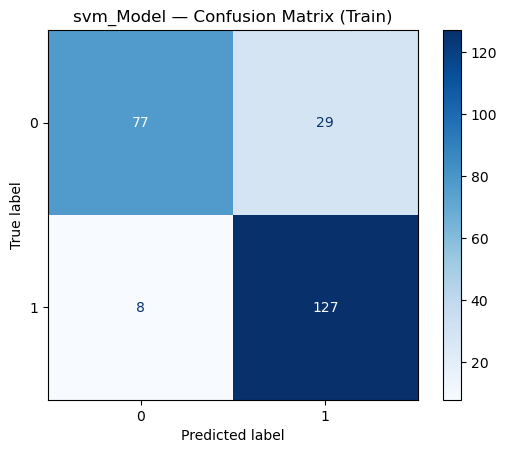

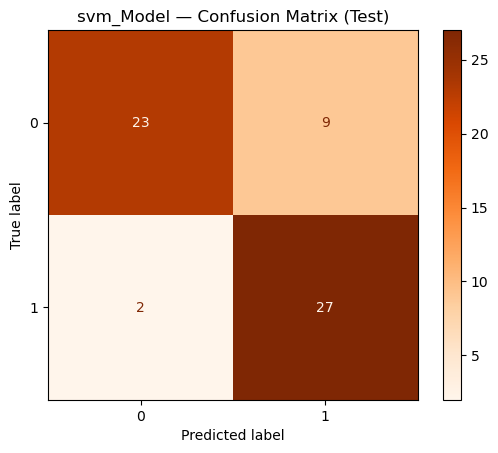

In [60]:
svm_Model_Report = model_performance('svm_Model', svm_Model, X_train_scaled, y_train, X_test_scaled, y_test, analysis_df)

###  Observations (Support Vector Machine Model)

- **Training performance** is strong with a better balance between both classes compared to KNN, though class 0 still has slightly lower recall.
- **Test performance** is the best so far, achieving a solid **84% accuracy** with **well-balanced precision and recall** across both classes.
- **Class 0 recall (0.72)** is higher than in previous models, improving its ability to detect true negatives.
- **Class 1 recall (0.91)** remains high, indicating the model effectively identifies positives while managing fewer false positives than KNN.
- Overall, SVM provides the **best generalization** among the models evaluated, with **consistent and robust performance** on both training and test data.


# Decision Tree Classifier #

In [61]:
estimator = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],             # or 'log_loss' in latest sklearn
    'max_depth': [x for x in range(1,20)],         # None Did not worked, So experimented with range
    'min_samples_split': [x for x in range(1,20)],              # node  having at least this many samples to split
    'min_samples_leaf': [x for x in range(1,20)],                # leaf nodes must have this many samples
    'max_features': [None, 'sqrt', 'log2']        # how many features to consider at each split
}


In [62]:
grid_dt = GridSearchCV(estimator, param_grid, cv=5, scoring='f1')

In [63]:
grid_dt.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='f1')

In [64]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 15,
 'min_samples_split': 9}

In [65]:
dt_Model = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 6,
    min_samples_split = 14,
    min_samples_leaf = 5,
    max_features = 'sqrt',
    random_state=42
)

In [66]:
dt_Model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=14, random_state=42)

Classification Report — dt_Model (Train)
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       106
           1       0.84      0.93      0.88       135

    accuracy                           0.86       241
   macro avg       0.87      0.85      0.85       241
weighted avg       0.86      0.86      0.86       241

Classification Report — dt_Model (Test)
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.71      0.83      0.76        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



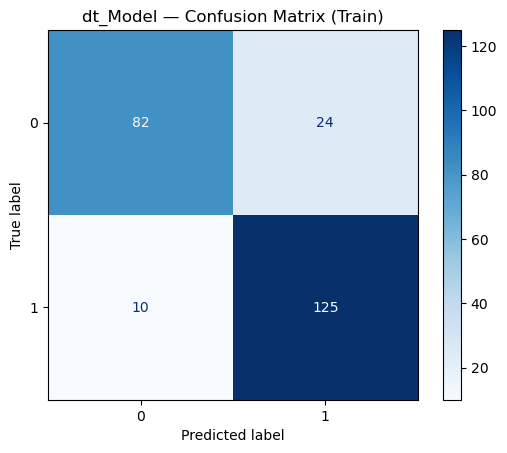

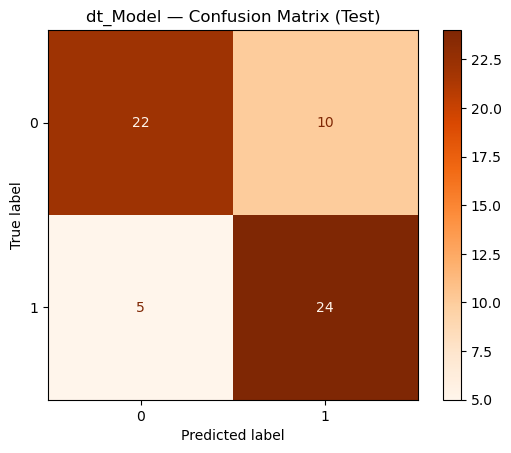

In [67]:
dt_Model_Report = model_performance('dt_Model', dt_Model, X_train, y_train, X_test, y_test, analysis_df)

In [68]:
dt_Model.feature_importances_

array([0.03752807, 0.        , 0.19352377, 0.05925718, 0.02458547,
       0.        , 0.        , 0.03596772, 0.04813133, 0.007919  ,
       0.0901019 , 0.33834998, 0.16463559])

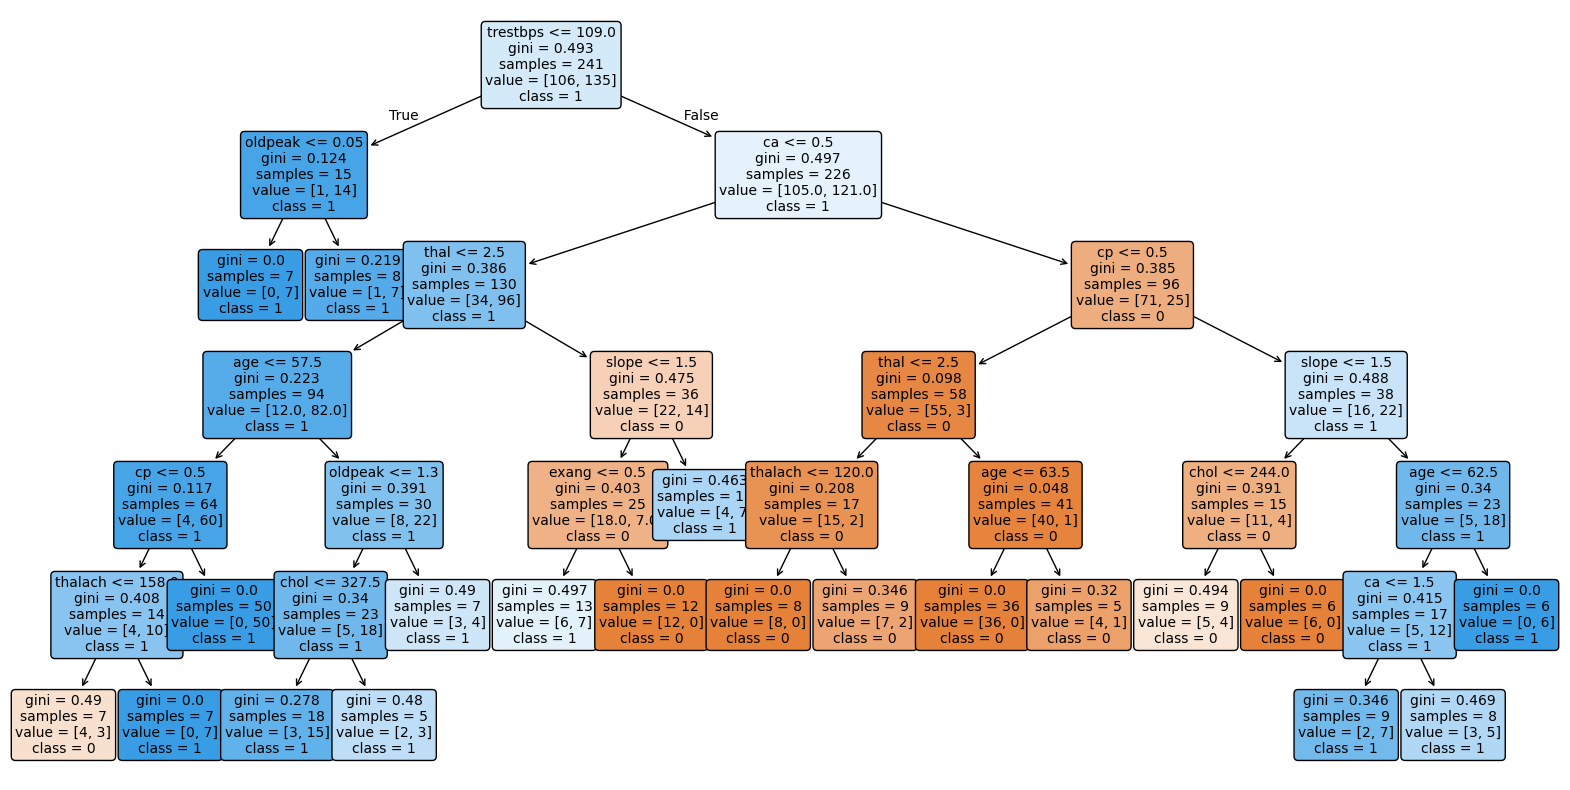

In [69]:
class_names = [str(cls) for cls in df['target'].unique()]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_Model,
    feature_names=df.columns.drop('target'),
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


###  Observations (Decision Tree Model)

- The **training performance** is reasonably strong, with high recall for class 1 and slightly lower recall for class 0.
- On the **test set**, the model shows a **clear decline in performance**, with accuracy dropping to 75%, the lowest among all models evaluated.
- **Class 0 recall (0.69)** and **class 1 recall (0.83)** indicate an imbalance — the model struggles to consistently detect true negatives.
- There's likely some **overfitting** to the training data.
- Overall, while the model captures some patterns, its **generalization is poor**, making it less reliable than logistic regression or SVM for this task.


# RandomForestClassifier #

In [70]:
rf_Model = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 9,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 'log2'
)

In [71]:
rf_Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='log2')

Classification Report — rf_Model (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       135

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Classification Report — rf_Model (Test)
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.77      0.93      0.84        29

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



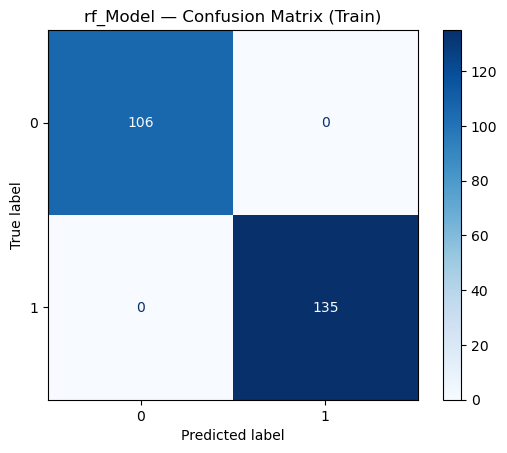

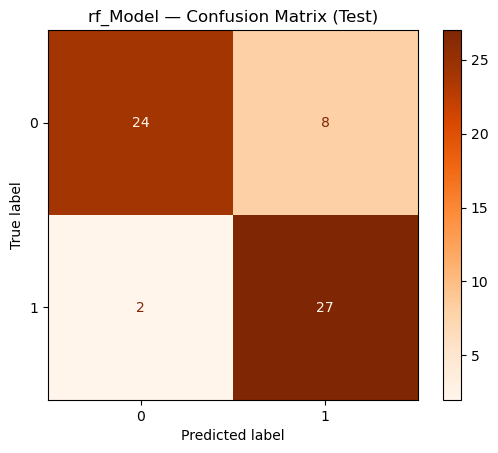

In [72]:
rf_Model_Report = model_performance('rf_Model', rf_Model, X_train, y_train, X_test, y_test, analysis_df)

In [73]:
rf_Model.estimators_[0]

DecisionTreeClassifier(max_depth=9, max_features='log2', random_state=658628821)

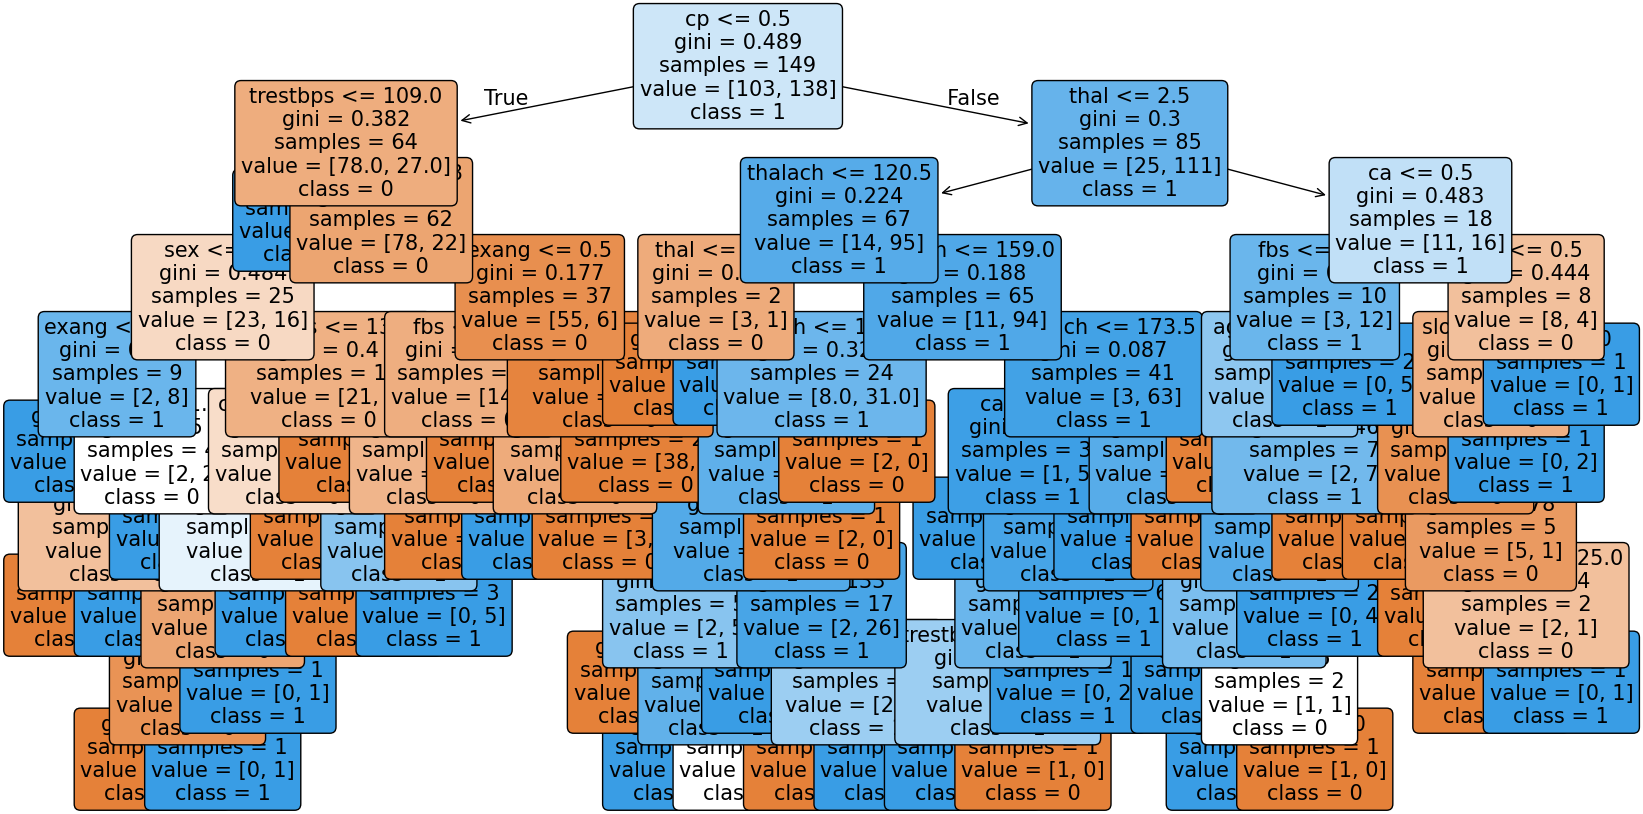

In [74]:
class_names = [str(cls) for cls in df['target'].unique()]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    rf_Model.estimators_[0],
    feature_names=df.columns.drop('target'),
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=15
)
plt.show()


In [75]:
analysis_df.loc['rf_Model']

TrainAccuracy          1.0
TestAccuracy      0.836066
TrainPrecision         1.0
TestPrecision     0.771429
TrainRecall            1.0
TestRecall        0.931034
TrainF1                1.0
TestF1             0.84375
CV                 0.80085
Name: rf_Model, dtype: object

###  Observations (Random Forest Model)

- The model perfectly fits the training data, indicating **severe overfitting**.
- Despite overfitting, it **generalizes surprisingly well** on the test set, matching SVM in test accuracy (84%).
- Maintains **balanced recall and precision** across both classes on the test set, showing robustness.
- **Class 0 recall** is slightly lower than class 1, similar to other models, but not as extreme.
- Overall, Random Forest delivers **strong test performance**


# AdaBoostClassifier #

In [76]:
estimator = AdaBoostClassifier()
param_grid = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [77]:
grid_ada = GridSearchCV(estimator, param_grid, cv=5, scoring='f1')

In [78]:
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [79]:
grid_ada.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}

In [80]:
ada_Model = AdaBoostClassifier(
    algorithm = 'SAMME',
    n_estimators = 100,
    learning_rate = 1.0,
)

In [81]:
ada_Model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

Classification Report — ada_Model (Train)
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       106
           1       0.91      0.93      0.92       135

    accuracy                           0.91       241
   macro avg       0.91      0.91      0.91       241
weighted avg       0.91      0.91      0.91       241

Classification Report — ada_Model (Test)
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.77      0.79      0.78        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



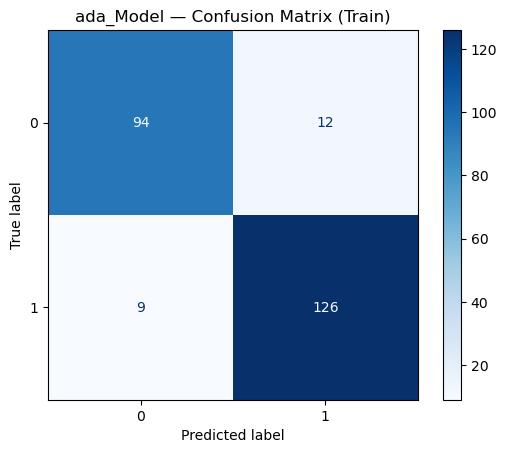

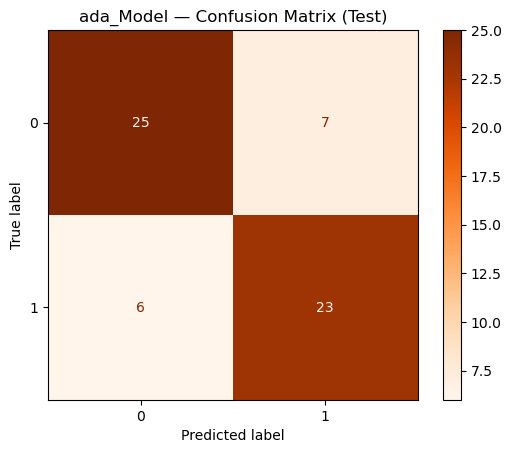

In [82]:
ada_Model_Report = model_performance('ada_Model', ada_Model, X_train, y_train, X_test, y_test, analysis_df)

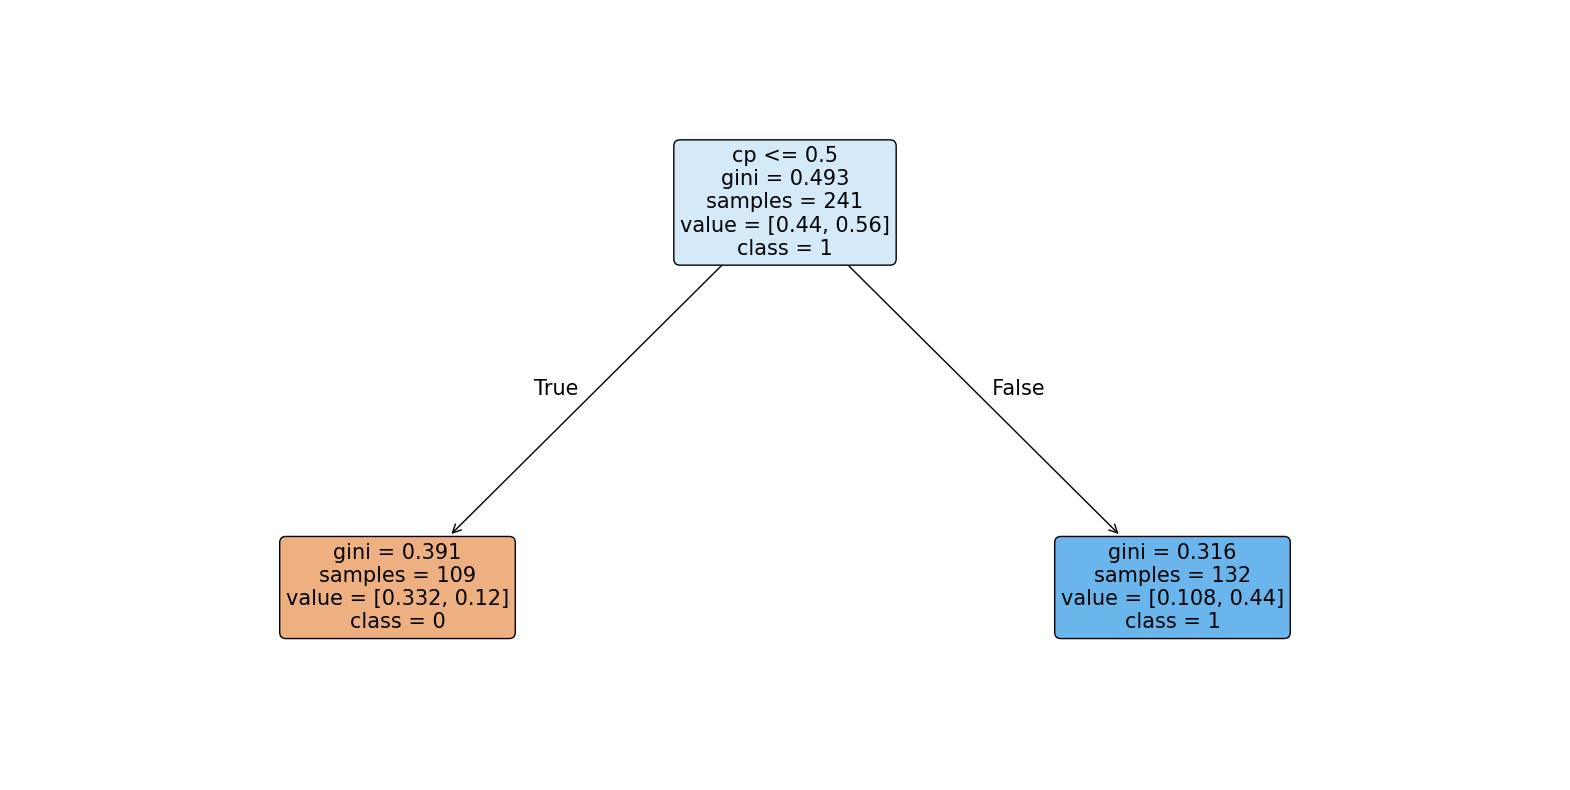

In [83]:
class_names = [str(cls) for cls in df['target'].unique()]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    ada_Model.estimators_[0],
    feature_names=df.columns.drop('target'),
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=15
)
plt.show()


###  Observations (AdaBoost Model)

- The model performs **very well on the training set**, with high and balanced precision and recall — no signs of overfitting here.
- However, **test performance drops** noticeably compared to SVM and Random Forest, indicating **weaker generalization**.
- Both classes show **balanced but modest recall and precision** on the test set — no dominant class bias, but also no standout strength.
- The gap between train and test performance suggests **some overfitting**, though it's more controlled than Random Forest.
- Overall, AdaBoost is **reliable but not optimal** in this case — better than KNN or Decision Tree, but not as strong as SVM or RF for this dataset.


# GradientBoostingClassifier #

In [84]:
estimator = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}


In [85]:
grid_gb = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [86]:
grid_gb.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [87]:
gb_Model = GradientBoostingClassifier(learning_rate=1.0, n_estimators=50)
gb_Model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=50)

Classification Report — gb_Model (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       135

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Classification Report — gb_Model (Test)
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



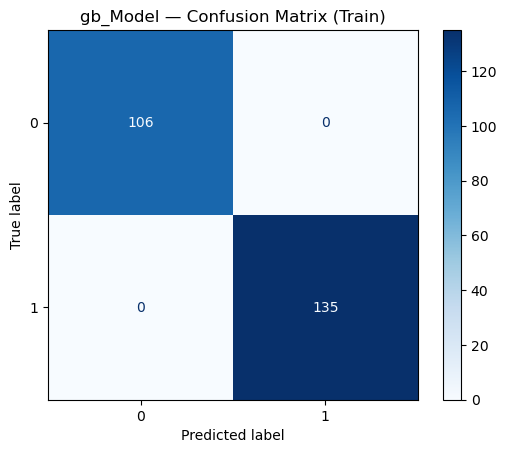

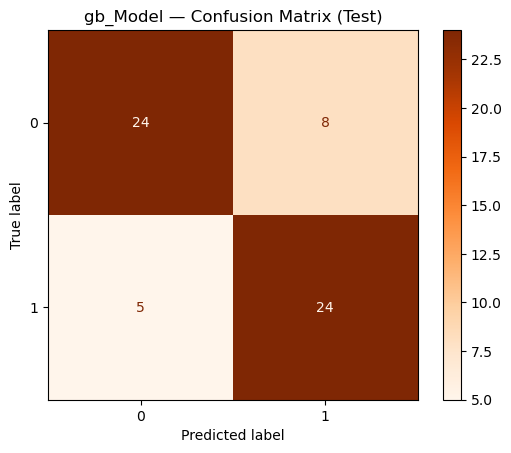

In [88]:
gb_Model_Report = model_performance('gb_Model', gb_Model, X_train, y_train, X_test, y_test, analysis_df)

### 🔍 Observations (Gradient Boosting Model)

- The model **overfits completely on the training set**, achieving a perfect 100% score, which is unrealistic for most real-world data.
- **Test performance is moderate**, with accuracy at 79%, similar to AdaBoost but lower than SVM or Random Forest.
- Both classes have **balanced but unspectacular precision and recall** on the test set — no severe class bias, but also no strong generalization.
- The sharp contrast between train and test scores confirms **classic overfitting**.
- Overall, Gradient Boosting is **not generalizing well**, and despite its complexity, it underperforms compared to simpler models like SVM in this context.


# XG Boost  #

In [89]:
estimator = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [90]:
grid_XGB = GridSearchCV(estimator, param_grid, cv=5, scoring='f1')
grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [91]:
grid_XGB.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

In [92]:
xg_Model = XGBClassifier(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=100,
    subsample=0.8
)

In [93]:
xg_Model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

Classification Report — xg_Model (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       135

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Classification Report — xg_Model (Test)
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



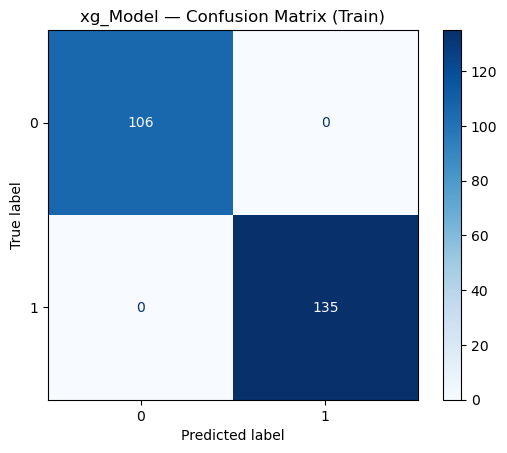

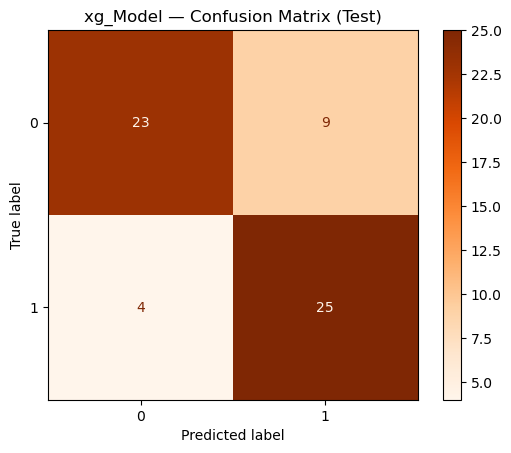

In [94]:
xg_Model_Report = model_performance('xg_Model', xg_Model, X_train, y_train, X_test, y_test, analysis_df)

### Observations (XGBoost Model)

- The model **perfectly overfits the training data**, just like Gradient Boosting and Random Forest, which is a common issue if not regularized properly.
- **Test accuracy is 79%**, showing no improvement over simpler models like logistic regression or SVM — despite being a more complex ensemble method.
- The **recall imbalance persists**: class 0 is under-represented in correct predictions compared to class 1.
- The small **gap between precision and recall** in test metrics suggests the model is not strongly biased toward false positives or negatives, but generalization is weak.
- Overall, despite its reputation, XGBoost **underperforms due to overfitting** — tune parameters like `max_depth`, `learning_rate`, and `n_estimators` to fix this.


# Model Selection #

In [95]:
analysis_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV
baseline_Model,0.871369,0.786885,0.856164,0.722222,0.925926,0.896552,0.88968,0.8,0.829677
logistic_Model,0.871369,0.803279,0.861111,0.742857,0.918519,0.896552,0.888889,0.8125,0.829762
knn_Model,0.825726,0.770492,0.796178,0.702703,0.925926,0.896552,0.856164,0.787879,0.809354
svm_Model,0.846473,0.819672,0.814103,0.75,0.940741,0.931034,0.872852,0.830769,0.838265
dt_Model,0.858921,0.754098,0.838926,0.705882,0.925926,0.827586,0.880282,0.761905,0.721769
rf_Model,1.0,0.836066,1.0,0.771429,1.0,0.931034,1.0,0.84375,0.80085
ada_Model,0.912863,0.786885,0.913043,0.766667,0.933333,0.793103,0.923077,0.779661,0.81318
gb_Model,1.0,0.786885,1.0,0.75,1.0,0.827586,1.0,0.786885,0.767517
xg_Model,1.0,0.786885,1.0,0.735294,1.0,0.862069,1.0,0.793651,0.81318


<b> Calculating the overfitting gap to identify models with poor generalization.

In [96]:
analysis_df["OverfitGap"] = analysis_df["TrainAccuracy"] - analysis_df["TestAccuracy"]

<b>Computing a Composite Score to balance generalization, test accuracy, and cross-validation performance.

In [97]:
analysis_df["CompositeScore"] = (
    0.3 * analysis_df['TestRecall'] +
    0.3 * analysis_df["TestAccuracy"] +
    0.3 * analysis_df["CV"] -
    0.1 * analysis_df["OverfitGap"].abs()
)


<b>Sorting models by Composite Score to identify the most balanced and reliable performer.

In [98]:
df_sorted = analysis_df.sort_values("CompositeScore", ascending=False)
df_sorted

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV,OverfitGap,CompositeScore
svm_Model,0.846473,0.819672,0.814103,0.75,0.940741,0.931034,0.872852,0.830769,0.838265,0.026801,0.774011
rf_Model,1.0,0.836066,1.0,0.771429,1.0,0.931034,1.0,0.84375,0.80085,0.163934,0.753992
logistic_Model,0.871369,0.803279,0.861111,0.742857,0.918519,0.896552,0.888889,0.8125,0.829762,0.068091,0.752069
baseline_Model,0.871369,0.786885,0.856164,0.722222,0.925926,0.896552,0.88968,0.8,0.829677,0.084484,0.745486
knn_Model,0.825726,0.770492,0.796178,0.702703,0.925926,0.896552,0.856164,0.787879,0.809354,0.055234,0.737396
xg_Model,1.0,0.786885,1.0,0.735294,1.0,0.862069,1.0,0.793651,0.81318,0.213115,0.717329
ada_Model,0.912863,0.786885,0.913043,0.766667,0.933333,0.793103,0.923077,0.779661,0.81318,0.125978,0.705353
gb_Model,1.0,0.786885,1.0,0.75,1.0,0.827586,1.0,0.786885,0.767517,0.213115,0.693285
dt_Model,0.858921,0.754098,0.838926,0.705882,0.925926,0.827586,0.880282,0.761905,0.721769,0.104823,0.680554


<h4><b>svm_Model stands out with the highest Composite Score (0.5816) and minimal overfit gap (0.0104) — indicating strong generalization and stability.</h3>

# Model Interpretability Using SHAP #

In [99]:
# Defining a prediction function that outputs probabilities
# Because SVM by default gives decision function, not probabilities
svm_predict = lambda x: svm_Model.predict_proba(x)[:, 1] if hasattr(svm_Model, "predict_proba") else svm_Model.decision_function(x)

# Using a small subset of training data as background for SHAP
X_shap_background = shap.sample(X_train_scaled, 100, random_state=42)

explainer = shap.KernelExplainer(svm_predict, X_shap_background)


In [100]:
# Taking a small subset for explanation (e.g., 10 samples from test set)
X_shap_test = X_test_scaled[:10]

In [101]:
# Computing SHAP values without triggering the widget
shap_values = explainer.shap_values(
    X_shap_test,
    nsamples=100,     # limiting the number of background evaluations (tune as needed)
    silent=True       # suppressing the interactive widget/progress bar
)


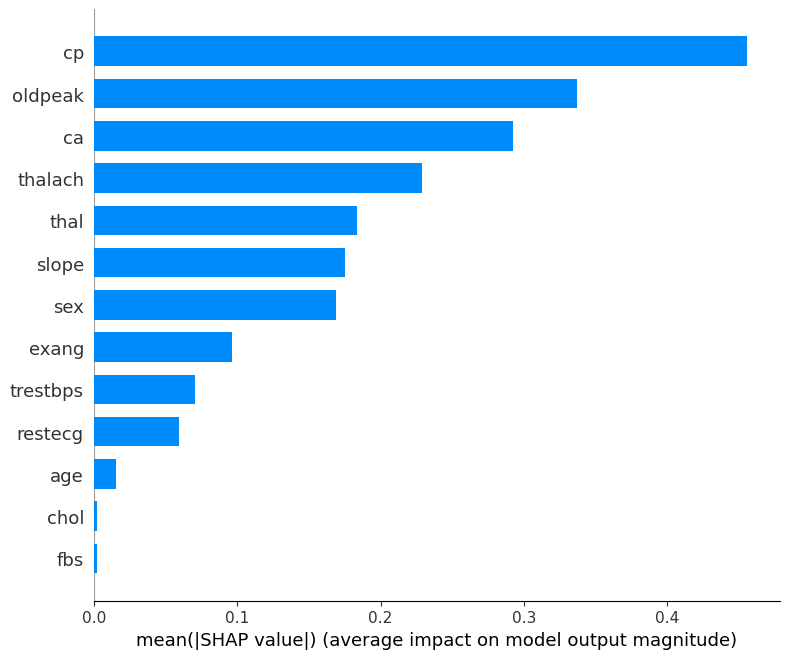

In [102]:
shap.summary_plot(
    shap_values, 
    X_shap_test, 
    feature_names=df.columns.drop('target'),    
    plot_type="bar"                 # bar chart of mean absolute SHAP values
)



## SHAP Global Feature Importance

The SHAP analysis for  SVM model (svm_Model) reveals the following ranked features:

1. **`cp` (Chest Pain Type)**  
   - Top driver of model output. Different pain categories (typical angina, non-anginal, asymptomatic, etc.) strongly influence risk predictions.

2. **`oldpeak` (ST Depression Induced by Exercise)**  
   - Measures exercise-induced ECG changes. Higher values push predictions toward “disease” due to ischemic stress patterns.

3. **`ca` (Number of Major Vessels Colored by Fluoroscopy)**  
   - Reflects extent of coronary artery blockage; more vessels → higher predicted risk.

4. **`thalach` (Maximum Heart Rate Achieved)**  
   - Blunted exercise heart rate response reduces predicted risk; higher achievable rates decrease risk.

5. **`thal`, `sex`, `slope` (Grouped Importance)**  
   - **`thal`**: Thallium stress test categories (“fixed” vs. “reversible” defects) contribute to ischemia detection.  
   - **`sex`**: Male sex slightly increases baseline risk in this cohort.  
   - **`slope`**: The slope of the peak exercise ST segment modulates ischemia severity.

6. **`exang` (Exercise-Induced Angina)**  
   - Presence of chest pain during exertion shifts predictions toward “disease.”

7. **`restecg` (Resting ECG Results)**  
   - Baseline ECG abnormalities (ST-T wave changes, hypertrophy) carry moderate predictive weight.

8. **`age`**  
   - Older age moderately increases predicted risk, consistent with epidemiological trends.

9. **`fbs` (Fasting Blood Sugar > 120 mg/dL)**  
   - Diabetes status contributes, but less so than acute stress-test variables in this dataset.

10. **`chol`:
    - **Lower Cholesterol/Glucose Weight:** These classical risk factors rank lower likely due to dataset characteristics


---



# Model Deployment #

In [103]:
# Using ColumnTransfor to transform different columns differently
# (name, transformer [StandardScaler, OrdinalEncoder], column_list)


preprocessor = ColumnTransformer([
    ('scaled_continous', StandardScaler(), continuous_features),
    ('categorical', 'passthrough', categorical_features)
])

In [104]:
svm_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('svm', SVC(C=2 , kernel='rbf', gamma=0.01))
    ]
)

In [105]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaled_continous',
                                                  StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('categorical', 'passthrough',
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('svm', SVC(C=2, gamma=0.01))])

In [106]:
with open('svm_pipeline.pkl', 'wb') as fp:
    pickle.dump(svm_pipeline, fp)

In [107]:
age = 55
sex = 1
cp = 2
trestbps = 130
chol = 250
fbs = 0
restecg = 1
thalach = 160
exang = 0
oldpeak = 1.5
slope = 2
ca = 0
thal = 3

In [108]:
predict_df = pd.DataFrame(
    {
        'age': [age],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [chol],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [thalach],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal]
    }
)

In [109]:
predict_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,1,2,130,250,0,1,160,0,1.5,2,0,3


In [110]:
prediction = svm_pipeline.predict(predict_df)
if prediction[0] == 0:
    print('No Heart Attack')
else:
    print('Heart Attack')

Heart Attack


# Conclusion #

<p><b>The final model achieved an accuracy of ~84% on the test set, indicating a reliable level of generalization. Performance was further evaluated using precision, recall, and F1-scores, with a balanced trade-off between false positives and false negatives—crucial in a medical setting

In [3]:
import sys
print("Python version:", sys.version)


import pandas as pd
import seaborn as sns
import matplotlib
import scipy
import numpy as np
import sklearn
import xgboost
import shap

print("pandas:", pd.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", matplotlib.__version__)
print("scipy:", scipy.__version__)
print("numpy:", np.__version__)
print("sklearn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)
print("shap:", shap.__version__)


Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
pandas: 2.2.2
seaborn: 0.13.2
matplotlib: 3.9.2
scipy: 1.13.1
numpy: 1.26.4
sklearn: 1.5.1
xgboost: 3.0.0
shap: 0.47.2
